# Apache PySpark by Example

**[June 2023 update]**

I've consolidated all the notebooks for this course into a single notebook. (The course videos will still show individual notebooks)


## Introduction to Google Colab

### Jupyter notebook basics

#### Code cells

In [ ]:
2*5

10

In [ ]:
import pandas as pd

In [ ]:
!ls

reported-crimes.csv  sample_data


#### Text cells

### Access to the shell

In [ ]:
!pwd

/content


In [ ]:
!ls

sample_data


## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [1]:
!pip install pyspark==3.4.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317122 sha256=8f2e88abab07d54ee8fb70a5f76ccc483f437d3536902ba5443f6dc706995537
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [2]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [3]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2024-06-04 16:35:13--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.199, 52.206.68.26, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.199|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [          <=>       ]   1.78G  2.43MB/s    in 11m 59s 

2024-06-04 16:47:14 (2.53 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1907181180]

total 1862492
-rw-r--r-- 1 root root 1907181180 Jun  4 10:53 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 Jun  3 13:35  sample_data


In [4]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1862492
-rw-r--r-- 1 root root 1907181180 Jun  4 10:53 reported-crimes.csv
drwxr-xr-x 1 root root       4096 Jun  3 13:35 sample_data


In [5]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

## (03-03) Schemas

In [ ]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [149]:
from pyspark.sql.types import IntegerType,StringType,BooleanType,TimestampType,DoubleType,StructField,StructType

In [ ]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [ ]:
schema = StructType([
  StructField('ID', StringType, True),
  StructField('Case Number', IntegerType, True),
  'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location'
])

AssertionError: dataType <class 'pyspark.sql.types.StringType'> should be an instance of <class 'pyspark.sql.types.DataType'>

In [9]:
labels = [('ID', StringType()),
 ('Case Number', StringType()),
 ('Date', StringType()),
 ('Block', StringType()),
 ('IUCR', StringType()),
 ('Primary Type', StringType()),
 ('Description', StringType()),
 ('Location Description', StringType()),
 ('Arrest', BooleanType()),
 ('Domestic', BooleanType()),
 ('Beat', IntegerType()),
 ('District', IntegerType()),
 ('Ward', IntegerType()),
 ('Community Area', IntegerType()),
 ('FBI Code', IntegerType()),
 ('X Coordinate', StringType()),
 ('Y Coordinate', StringType()),
 ('Year', IntegerType()),
 ('Updated On', StringType()),
 ('Latitude', DoubleType()),
 ('Longitude', DoubleType()),
 ('Location', StringType())]
labels

[('ID', StringType()),
 ('Case Number', StringType()),
 ('Date', StringType()),
 ('Block', StringType()),
 ('IUCR', StringType()),
 ('Primary Type', StringType()),
 ('Description', StringType()),
 ('Location Description', StringType()),
 ('Arrest', BooleanType()),
 ('Domestic', BooleanType()),
 ('Beat', IntegerType()),
 ('District', IntegerType()),
 ('Ward', IntegerType()),
 ('Community Area', IntegerType()),
 ('FBI Code', IntegerType()),
 ('X Coordinate', StringType()),
 ('Y Coordinate', StringType()),
 ('Year', IntegerType()),
 ('Updated On', StringType()),
 ('Latitude', DoubleType()),
 ('Longitude', DoubleType()),
 ('Location', StringType())]

In [8]:
schema = StructType([StructField(x[0],x[1],True) for x in labels])
schema

NameError: name 'labels' is not defined

In [ ]:
rc = spark.read.csv("reported-crimes.csv", schema=schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: integer (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.show(5)

+--------+-----------+--------------------+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|        Description|Location Description|  null|    null|null|    nul

## (03-04) Working with columns

**Display only the first 5 rows of the column name IUCR**

In [ ]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|IUCR|
|0560|
|0110|
|0110|
|0620|
+----+
only showing top 5 rows



In [ ]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|IUCR|
|0560|
|0110|
|0110|
|0620|
+----+
only showing top 5 rows



In [ ]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|IUCR|
|0560|
|0110|
|0110|
|0620|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [ ]:
rc.select(col('Case Number'),col('Date'),col('Arrest')).show(4)

+-----------+--------------------+------+
|Case Number|                Date|Arrest|
+-----------+--------------------+------+
|Case Number|                Date|  null|
|   HN549294|08/25/2007 09:22:...| false|
|   JE240540|05/24/2021 03:06:...|  true|
|   JE279849|06/26/2021 09:24:...|  true|
+-----------+--------------------+------+
only showing top 4 rows



In [ ]:
rc.select('Case Number', 'Date', 'Arrest').show(4)

+-----------+--------------------+------+
|Case Number|                Date|Arrest|
+-----------+--------------------+------+
|Case Number|                Date|  null|
|   HN549294|08/25/2007 09:22:...| false|
|   JE240540|05/24/2021 03:06:...|  true|
|   JE279849|06/26/2021 09:24:...|  true|
+-----------+--------------------+------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [ ]:
from pyspark.sql.functions import lit
rc.withColumn('One', lit(1)).show(5)

+--------+-----------+--------------------+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+--------------------+--------------------+----+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|                Date|               Block|IUCR|Primary Type|        Description|Location Description|  null|    null|

**Remove the column IUCR**

In [ ]:
rc = rc.drop('IUCR')
rc.show(5)

+--------+-----------+--------------------+--------------------+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|Primary Type|        Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+--------------------+--------------------+------------+-------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|                Date|               Block|Primary Type|        Description|Location Description|  null|    null|null|    null|null|          nul

## (03-05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [ ]:
rc2 = spark.read.csv('reported-crimes.csv',header=True, schema=schema).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))

In [ ]:
rc2.count()

4

In [ ]:
rc2.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: boolean (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: integer (nullable = true)
 |-- District: integer (nullable = true)
 |-- Ward: integer (nullable = true)
 |-- Community Area: integer (nullable = true)
 |-- FBI Code: integer (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [ ]:
rc.count()

8068563

In [ ]:
rc2 = rc2.drop('IUCR') #Compatibility with "(3-04) Working with columns"

In [ ]:
rc.union(rc2).orderBy('Date', ascending=True).count()

8068567

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [ ]:
rc.groupBy('Primary Type').count().show()

+--------------------+-------+
|        Primary Type|  count|
+--------------------+-------+
|OFFENSE INVOLVING...|  57907|
|CRIMINAL SEXUAL A...|   8696|
|            STALKING|   5339|
|PUBLIC PEACE VIOL...|  53269|
|           OBSCENITY|    872|
|               ARSON|  13809|
|   DOMESTIC VIOLENCE|      1|
|            GAMBLING|  14638|
|   CRIMINAL TRESPASS| 219363|
|             ASSAULT| 532253|
|LIQUOR LAW VIOLATION|  15110|
| MOTOR VEHICLE THEFT| 403957|
|               THEFT|1704698|
|             BATTERY|1471786|
|             ROBBERY| 304091|
|            HOMICIDE|  13208|
|           RITUALISM|     24|
|    PUBLIC INDECENCY|    203|
| CRIM SEXUAL ASSAULT|  27485|
|   HUMAN TRAFFICKING|    107|
+--------------------+-------+
only showing top 20 rows



In [ ]:
rc.groupBy('Primary Type').count().orderBy('count', ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1704698|
|            BATTERY|1471786|
|    CRIMINAL DAMAGE| 919298|
|          NARCOTICS| 753682|
|            ASSAULT| 532253|
|      OTHER OFFENSE| 501287|
|           BURGLARY| 432419|
|MOTOR VEHICLE THEFT| 403957|
| DECEPTIVE PRACTICE| 364327|
|            ROBBERY| 304091|
+-------------------+-------+
only showing top 10 rows



## (03-06) Challenge

**What percentage of reported crimes resulted in an arrest?**

In [ ]:
rc.groupBy('Arrest').count().show()

+------+-------+
|Arrest|  count|
+------+-------+
|  null|      1|
|  true|2070630|
| false|5997932|
+------+-------+



In [ ]:
percentage = 2070630.0 / rc.count() * 100
percentage

25.662934031747657

  **What are the top 3 locations for reported crimes?**

In [ ]:
rc.groupBy('Location').count().orderBy('count', ascending=False).show(4)

+--------------------+-----+
|            Location|count|
+--------------------+-----+
|                null|88885|
|(41.976290414, -8...|14482|
|(41.754592961, -8...|10568|
|(41.883500187, -8...| 8857|
+--------------------+-----+
only showing top 4 rows



In [ ]:
rc.groupBy('Location Description').count().orderBy('count', ascending=False).show(4)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|2107672|
|           RESIDENCE|1340273|
|           APARTMENT| 932839|
|            SIDEWALK| 743394|
+--------------------+-------+
only showing top 4 rows



## (04-01) Built-in functions

In [ ]:
from pyspark.sql import functions

In [10]:
print(dir(functions))

NameError: name 'functions' is not defined

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [6]:
from pyspark.sql.functions import lower,upper,substring,min,max,date_add,date_sub

### Numeric functions


**Show the oldest date and the most recent date**

### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

## (04-02) Working with dates

In [11]:
from pyspark.sql.functions import to_date, to_timestamp, lit

  **2019-12-25 13:30:00**

In [37]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [39]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('Christmas'),'yyyy-MM-dd HH:mm:ss')).show(1)

+---------------------------------------+--------------------------------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas, yyyy-MM-dd HH:mm:ss)|
+---------------------------------------+--------------------------------------------+
|                             2019-12-25|                         2019-12-25 13:30:00|
+---------------------------------------+--------------------------------------------+



**25/Dec/2019 13:30:00**

In [40]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [41]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 01:30:00 PM**

In [51]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)], ['Christmas'])
df.show(1)

+--------------------+
|           Christmas|
+--------------------+
|12/25/2019 01:30:...|
+--------------------+



In [60]:
df.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss a'), to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss a')).show(1)

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



In [ ]:
nrc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
nrc.show(5)

## (04-03) Joins

**Download police station data**

In [64]:
!wget -O police-station.csv https://data.cityofchicago.org/resource/z8bn-74gv.csv

--2024-06-04 18:31:28--  https://data.cityofchicago.org/resource/z8bn-74gv.csv
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.140.205, 52.206.140.199, 52.206.68.26
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.140.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   6.22K  --.-KB/s    in 0s      

2024-06-04 18:31:28 (1.54 GB/s) - ‘police-station.csv’ saved [6365]



In [65]:
!ls

police-station.csv  reported-crimes.csv  sample_data


In [66]:
ps = spark.read.csv('police-station.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

In [67]:
rc.show(5)

+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
|      ID|Case Number|               Date|             Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|Latitude|Longitude|Location|
+--------+-----------+-------------------+------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+---------+--------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|     

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [68]:
rc.cache() #For performance
rc.count()

ERROR:root:KeyboardInterrupt while sending command.
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/usr/local/lib/python3.10/dist-packages/py4j/clientserver.py", line 511, in send_command
    answer = smart_decode(self.stream.readline()[:-1])
  File "/usr/lib/python3.10/socket.py", line 705, in readinto
    return self._sock.recv_into(b)
KeyboardInterrupt


KeyboardInterrupt: 

In [69]:
rc.select('District').distinct().show()

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
+--------+
only showing top 20 rows



In [71]:
ps.select('district_name').distinct().show()

+--------------+
| district_name|
+--------------+
|      Harrison|
|  Chicago Lawn|
|   Albany Park|
|   Rogers Park|
|     Englewood|
|Grand Crossing|
|        Austin|
|       Deering|
|   Morgan Park|
|            IL|
| Grand Central|
|     Near West|
| South Chicago|
|       Lincoln|
|       Central|
|  Headquarters|
|     Town Hall|
|Jefferson Park|
|       Gresham|
|   Shakespeare|
+--------------+
only showing top 20 rows



In [72]:
from pyspark.sql.functions import lpad

In [73]:
ps.select(lpad('district', 3, '0')).show()

+--------------------+
|lpad(district, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ","|
+--------------------+
only showing top 20 rows



In [75]:
ps = ps.withColumn('Format_District', lpad('district', 3, '0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    district|district_name|            address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|Format_District|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [76]:
rc.join(ps, rc.District == ps.Format_District, 'left_outer').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+--------+-------------+--------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|district|district_name|             address|   city|state|  zip|             website|       phone|         fax|         tty|x_coordinate|y_coordinate|   latitude|   longitude|            location|Format_Dist

In [78]:
ps.columns

['district',
 'district_name',
 'address',
 'city',
 'state',
 'zip',
 'website',
 'phone',
 'fax',
 'tty',
 'x_coordinate',
 'y_coordinate',
 'latitude',
 'longitude',
 'location',
 'Format_District']

In [80]:
rc.join(ps, rc.District == ps.Format_District, 'left_outer').drop('address','city','state','zip','website','phone','fax','tty','x_coordinate','y_coordinate','latitude','longitude','location','Format_District').show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+-------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|district|district_name|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+--------+-------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|        null

## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [106]:
import pyspark.sql.column

In [123]:
rcnc = rc.filter(col('Primary Type').contains('NON'))
rcnc.groupBy('Description').count().show(50, False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |107  |
|FOUND PASSPORT                             |4    |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|FOID - REVOCATION                          |75   |
|CONCEALED CARRY LICENSE REVOCATION         |4    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



AttributeError: 'int' object has no attribute 'show'

+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
| ID|Case Number|Date|Block|IUCR|Primary Type|Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On|Latitude|Longitude|Location|
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+
+---+-----------+----+-----+----+------------+-----------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------+--------+---------+--------+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [200]:
rc.show()

+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
| 5741943|   HN549294|2007-08-25 09:22:18|  074XX N ROGERS AVE|0560|             ASSAULT|              SIMPLE|               OT

In [131]:
from pyspark.sql.functions import dayofweek

In [153]:
days = rc.select(dayofweek('Date').alias("Date"))

In [164]:
days.schema

StructType([StructField('Date', IntegerType(), True)])

In [ ]:
tempSchema = StructType([StructField('Date', StringType(), True)])

In [163]:
rc.union(days.Date).show(1)

TypeError: Column is not iterable

In [208]:
days_time.select('Date').collect()[0][0]
days_time.select('count').collect()[1][0]

1017514

In [177]:
import matplotlib.pyplot as plt

In [199]:
days_time = days_time.withColumn('count', col('count').cast(IntegerType()))
days_time.show()

+----+-------+
|Date|  count|
+----+-------+
|   1| 912489|
|   6|1017514|
|   3| 968585|
|   5| 965164|
|   4| 974424|
|   7| 965637|
|   2| 953294|
+----+-------+



In [212]:
y_ans_val = [days_time.select('count').collect()[x][0] for x in range(0,7)]
x_ts = [days_time.select('Date').collect()[x][0] for x in range(0,7)]

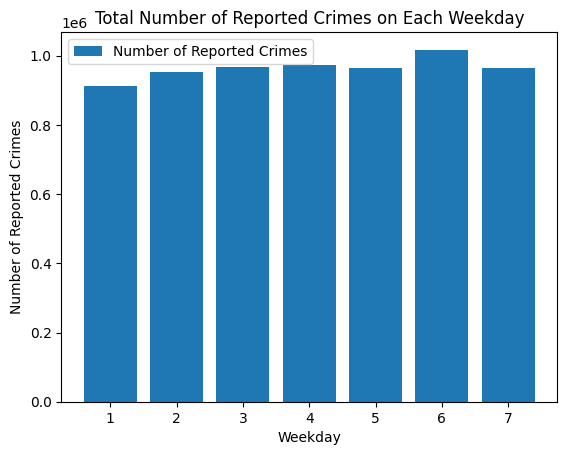

In [214]:
plt.bar(x_ts, y_ans_val)

plt.ylabel('Number of Reported Crimes')
plt.xlabel('Weekday')
plt.title('Total Number of Reported Crimes on Each Weekday')
plt.legend(['Number of Reported Crimes'], loc='upper left')

plt.show()

## (05-01) RDDs setup

**How many police stations are there?**

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**